**0. Veri Setinin Hazırlanması**

In [1]:
# Kullanacağımız kütüphaneler

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("../input/data.csv", encoding="ISO-8859-1")
df.head()



  



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Veri setinde rasgele eksik veriler oluşturma

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

**1. Veriye İlk Bakış**

In [4]:
#Örnek Veri Görüntüleme
#Rastgele satırları kontrol ederek veri yapısını inceleyebiliriz

print(df.sample(4))



       InvoiceNo StockCode                    Description  Quantity  \
70059        NaN     20685          DOORMAT RED RETROSPOT       1.0   
269875    560504     22721  SET OF 3 CAKE TINS SKETCHBOOK       6.0   
244256    558475     23287        RED VINTAGE SPOT BEAKER       1.0   
2748      536592     22553         PLASTERS IN TIN SKULLS       1.0   

            InvoiceDate  UnitPrice  CustomerID         Country  
70059   1/25/2011 10:45       7.46         NaN  United Kingdom  
269875  7/19/2011 11:47       4.95     13081.0             NaN  
244256  6/29/2011 15:58       1.63         NaN  United Kingdom  
2748    12/1/2010 17:06       3.36         NaN  United Kingdom  


info() metodu kullanılarak veri setinin yapısal bilgilerine erişilebilir. Veri türlerinin doğruluğunu ve kayıt sayılarını dikkatlice kontrol etmek önemlidir.z.

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526028 non-null  object 
 1   StockCode    525892 non-null  object 
 2   Description  524325 non-null  object 
 3   Quantity     526113 non-null  float64
 4   InvoiceDate  525810 non-null  object 
 5   UnitPrice    526019 non-null  float64
 6   CustomerID   394717 non-null  float64
 7   Country      525826 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


dtypes() fonksiyonu sayesinde veri tiplerini ve kolon isimlerini görebiliriz.

In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
# Eksik değer sayılarının sütun bazında saptanması isnull().sum() ile sağlanabilir.

df.isnull().sum()

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice       15890
CustomerID     147192
Country         16083
dtype: int64

nunique() fonksiyonu ile eşsiz verilerin sayısı saptanır.

In [8]:

df.nunique()

InvoiceNo      25731
StockCode       4064
Description     4217
Quantity         710
InvoiceDate    23144
UnitPrice       1594
CustomerID      4371
Country           38
dtype: int64

"object" türündeki veriler kimi zaman kategorik değişken olabilmektedir. Bu sebeple doğru veri türünü sağlamak veri analizi için önemlidir.

In [9]:
#Country değişkeni veri setinde object olarak verilmişti fakat aslında kategorik değişkendir.
#Aşağıdaki kod satırında değişken türü değiştirilmiştir.

df['Country'] = df['Country'].astype('category')

df['CustomerID'] = df['CustomerID'].astype('object')

df.dtypes

InvoiceNo        object
StockCode        object
Description      object
Quantity        float64
InvoiceDate      object
UnitPrice       float64
CustomerID       object
Country        category
dtype: object


Veri setinin temel istatistiksel özelliklerini incelemek için `describe()` fonksiyonundan yararlanıyoruz. 

Bu fonksiyon, eksik değerleri dikkate almaz ve varsayılan ayarlarıyla yalnızca sayısal değişkenler için özet bilgiler suna

.T eklentisi elde edeceğimiz çıktıyı transpose eder.r.

In [10]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Quantity,526113.0,9.548825,221.218522,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,526019.0,4.621448,97.707221,-11062.06,1.25,2.08,4.13,38970.0


**2. Eksik Verilerin Analizi**


Eksik veri analizi, bir veri setinde eksik veya boş değerlerin tespit edilmesini, bu eksikliklerin nedenlerini anlamayı ve veri analizi sürecine etkilerini değerlendirmeyi amaçlayan bir işlemdir. Python'da bu analiz genellikle **`isnull()`**, **`notnull()`**, ve **`sum()`** gibi fonksiyonlar kullanılarak yapılır. Eksik veriler tespit edildikten sonra, bunları temizlemek, doldurmak veya analizden hariç tutmak için uygun stratejiler uygulanır.


In [11]:
df.isna().sum()

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice       15890
CustomerID     147192
Country         16083
dtype: int64

Veri setindeki tüm eksik verilerin sayısı:

In [12]:
df.isna().sum().sum()

260542

Veri setindei eksik olmayan veri sayısı:

In [13]:
df.notnull().sum()

InvoiceNo      526028
StockCode      525892
Description    524325
Quantity       526113
InvoiceDate    525810
UnitPrice      526019
CustomerID     394717
Country        525826
dtype: int64

-Sabit Değerlerle Doldurma: Eksik değerler belirli bir sabit değerle (örneğin 0) doldurulur.

In [14]:
df['Quantity'].fillna(0) #inplace=True ile değişiklikler veri setine işlenir.


0          6.0
1          6.0
2          8.0
3          6.0
4          6.0
          ... 
541904    12.0
541905     6.0
541906     4.0
541907     4.0
541908     3.0
Name: Quantity, Length: 541909, dtype: float64

-Ortalama/Medyan ile Doldurma: Eksik değerler, ilgili kolonun ortalaması veya medyanı ile doldurulur.

In [15]:
df['Quantity'].fillna(df['Quantity'].mean())


0          6.0
1          6.0
2          8.0
3          6.0
4          6.0
          ... 
541904    12.0
541905     6.0
541906     4.0
541907     4.0
541908     3.0
Name: Quantity, Length: 541909, dtype: float64

-Eksik verileri en çok tekrar eden değerlerle doldurma

In [16]:
df['Quantity'].fillna(df['Quantity'].mode()[0])


0          6.0
1          6.0
2          8.0
3          6.0
4          6.0
          ... 
541904    12.0
541905     6.0
541906     4.0
541907     4.0
541908     3.0
Name: Quantity, Length: 541909, dtype: float64

-Eksik Verileri Silme

-Eğer eksik veriler az bir oranı kapsıyorsa, bu satır veya sütunlar tamamen kaldırılabilir.

In [17]:
df.dropna(axis=0) #eksik verileri içeren satırları silme

df.dropna(axis=1) #eksik verileri içeren sütunları silme


""
0
1
2
3
4
...
541904
541905
541906
541907


-"missingno", eksik verileri analiz etmek ve görselleştirmek için kullanılan bir kütüphanedir.

-Daha hızlı ve görsel bir şekilde eksik veri sorunlarını anlamanızı sağlar

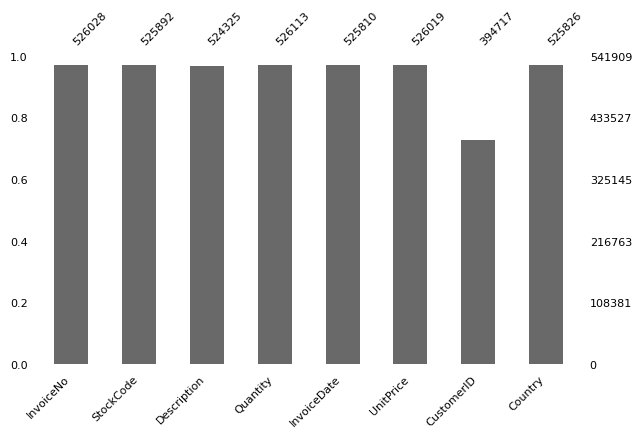

In [18]:
# missingno kütüphanesini yüklemeliyiz
import missingno as msno

msno.bar(df = df,
         figsize = (7, 4),
         fontsize = 8);

missingno kütüphanesi kullanılarak eksik veriler arasındaki ilişkileri görselleştirmek için bir ısı haritası (heatmap) oluşturabiliriz.


-Isı haritasında, her bir hücre farklı renklerle gösterilir.

-1'e Yakın: Eksik veriler arasında güçlü bir ilişki olduğunu gösterir. Örneğin, iki sütunda aynı eksik veri paterni varsa bu değer 1'e yaklaşır.

-0'a Yakın: İki sütun arasında eksik veri açısından bir ilişki olmadığını gösterir.

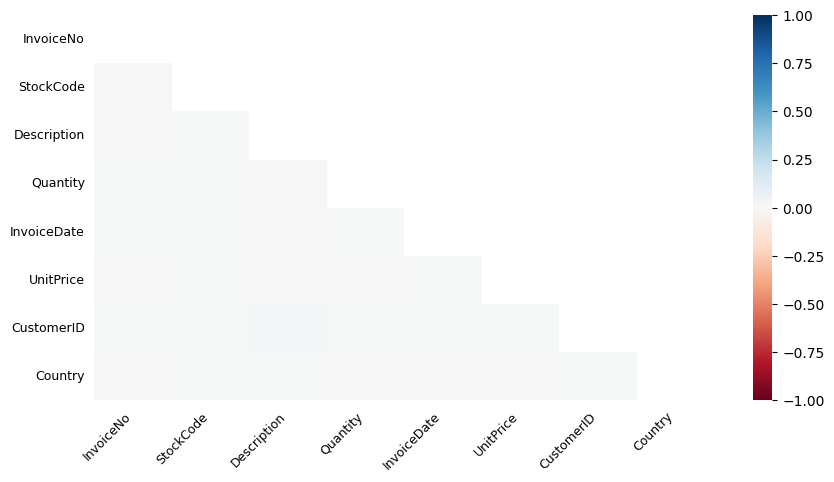

In [19]:
msno.heatmap(df = df,
             figsize = (10, 5),
             fontsize = 9);

Eksik verilerin silinmesi, veri setinin büyüklüğü, eksik verilerin oranı ve dağılımı göz önünde bulundurularak yapılmalıdır.

**İyi Durumlar:**

Eksik veriler küçük bir oran oluşturuyorsa.

Eksik veriler rastgele (MCAR) dağılmışsa.

Daha karmaşık doldurma yöntemleri kullanılamıyorsa.

**Kötü Durumlar:**

Eksik veriler büyük bir oran oluşturuyorsa.

Eksik veriler sistematik bir şekilde dağılmışsa.

Önemli değişkenlerde eksik veriler varsa.


Veri setimizin boyutunu dikkate alarak, eksik verileri silmek daha uygun bir yaklaşım olabilir. 


In [20]:
df.dropna(axis=0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4.0,12/9/2011 12:50,3.75,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4.0,12/9/2011 12:50,4.15,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


Veri setimizde "UnitPrice" ve buna karşılık gelen "Description" yani ürünler mevcut "UnitPrice"'da eksik olan değerleri "Description" karşılığına gelen Price verilerinin ortalamasını alarak doldurabiliriz.

In [21]:
numerical_fillna =df.groupby("Description")["UnitPrice"].mean()

In [22]:

df["UnitPrice"] = df["UnitPrice"].fillna(df["Description"].map(numerical_fillna))
df.isnull().sum()

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice         494
CustomerID     147192
Country         16083
dtype: int64

Kalan eksik verileri silebiliriz

In [23]:
df.dropna(axis=0,inplace=True)

In [24]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**3.Kategorik Değişken Analizi**

In [25]:
df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329812 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    329812 non-null  object  
 1   StockCode    329812 non-null  object  
 2   Description  329812 non-null  object  
 3   Quantity     329812 non-null  float64 
 4   InvoiceDate  329812 non-null  object  
 5   UnitPrice    329812 non-null  float64 
 6   CustomerID   329812 non-null  object  
 7   Country      329812 non-null  category
dtypes: category(1), float64(2), object(5)
memory usage: 20.4+ MB


Kategorik Değişkenin eşsiz değerlerini ve sayısını görebiliriz

In [26]:
df["Country"].unique()



['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', ..., 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA']
Length: 37
Categories (38, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']

In [27]:
df["Country"].nunique()

37

Kategorik değişken için gözlem sayısı bulunur

In [28]:
for col in df.columns:
    if  df[col].dtype.name == "category":  # Kategorik sütunları kontrol et
        print(f'{df[col].value_counts()}\n', 5*"*********")
    else:
        0
       

    

Country
United Kingdom          293530
Germany                   7626
France                    6864
EIRE                      6071
Spain                     2029
Netherlands               1918
Belgium                   1673
Switzerland               1529
Portugal                  1160
Australia                 1024
Norway                     881
Italy                      635
Channel Islands            595
Finland                    571
Cyprus                     491
Sweden                     374
Austria                    333
Denmark                    310
Japan                      294
Poland                     274
USA                        232
Unspecified                199
Israel                     194
Singapore                  192
Iceland                    152
Canada                     129
Greece                     115
Malta                      104
United Arab Emirates        62
European Community          53
RSA                         49
Lebanon                     40


Kategorik değişkenleri görselleştirerek daha iyi analiz yapabilirsiniz.

Bar plot: Kategorilerin frekansını görsel olarak gösterir.

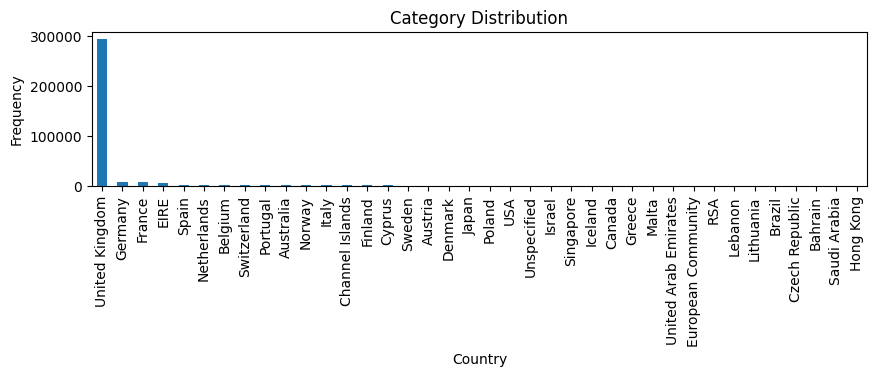

In [29]:
import matplotlib.pyplot as plt

df['Country'].value_counts().plot(kind='bar', figsize=(10,2))
plt.title('Category Distribution')
plt.ylabel('Frequency')
plt.show()


Kategorik değişkenlere göre veri setini gruplayarak bazı istatistikler (örneğin, ortalama, toplam) alabilirsiniz.

In [30]:
df.groupby('Country')['UnitPrice'].mean()


/tmp/ipykernel_17/4112098360.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Country')['UnitPrice'].mean()


Country
Australia                 3.246814
Austria                   4.017877
Bahrain                   3.936667
Belgium                   3.788234
Brazil                    4.417420
Canada                    6.623576
Channel Islands           4.711991
Cyprus                    6.238964
Czech Republic            3.314400
Denmark                   3.440842
EIRE                      5.281172
European Community        5.523912
Finland                   5.692248
France                    5.328280
Germany                   3.780644
Greece                    4.570577
Hong Kong                      NaN
Iceland                   2.525747
Israel                    3.744609
Italy                     4.972758
Japan                     3.587076
Lebanon                   5.643947
Lithuania                 2.637202
Malta                     4.985522
Netherlands               2.745355
Norway                    5.666023
Poland                    4.154033
Portugal                  9.280666
RSA         

Bu kod, Country sütunundaki en sık görülen 10 ülkeyi seçip, yalnızca bu ülkelerle ilgili verileri filtreleyerek, her bir ülke için UnitPrice değerlerinin dağılımını görselleştiren bir kategorik grafik (catplot) oluşturur. Bu sayede sadece en popüler 10 ülke ve ilgili fiyat bilgilerini görüntülemiş olursunuz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

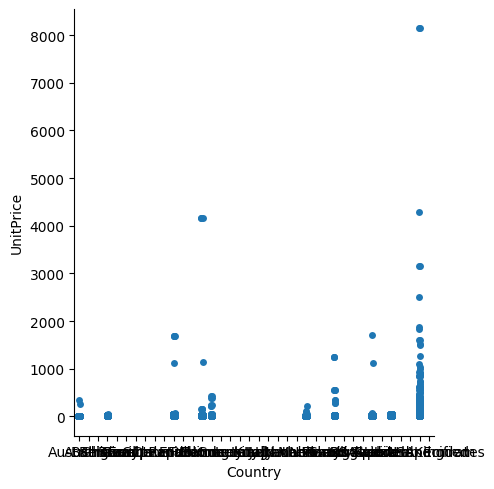

In [31]:
import seaborn as sns

#Country sütunundaki en popüler 10 değeri seçiyoruz
top_10_countries = df['Country'].value_counts().nlargest(10).index

# Veri setini filtreliyoruz, sadece top 10 ülke
filtered_df = df[df['Country'].isin(top_10_countries)]

# Catplot'u çiziyoruz
sns.catplot(data = filtered_df,
            x = "Country",
            y = "UnitPrice");

Bu kod, her bir ülkenin satış miktarlarının (Quantity) ortalamalarını hesaplayarak, hangi ülkelerde daha fazla satış yapıldığını ve hangi ülkelerde daha düşük satış gerçekleştiğini gösterir. 

In [32]:
df_price = df.groupby(by = "Country")["Quantity"].mean().to_frame().reset_index().sort_values(by = "Quantity", ascending = False)

df_price

/tmp/ipykernel_17/307410567.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_price = df.groupby(by = "Country")["Quantity"].mean().to_frame().reset_index().sort_values(by = "Quantity", ascending = False)


,Country,Quantity
24,Netherlands,86.129301
20,Japan,77.666667
32,Sweden,75.005348
0,Australia,64.944336
8,Czech Republic,22.360000
30,Singapore,21.520833
22,Lithuania,19.437500
9,Denmark,19.435484
5,Canada,19.434109
10,EIRE,18.157470


**4. Sürekli Değişken Analizi**

Veri setindeki nümerik veriler seçilir

In [33]:
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Quantity,UnitPrice
0,6.0,2.55
1,6.0,3.39
2,8.0,2.75
3,6.0,3.39
4,6.0,3.39


In [34]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,329812.0,12.277692,236.442226,-74215.0,2.00,5.00,12.00,80995.00
UnitPrice,329812.0,3.399507,33.087072,0.0,1.25,1.95,3.75,8142.75


Bu kod parçası, veri setinizdeki yalnızca sayısal sütunları seçip bu sütunlar arasındaki korelasyonu hesaplar ve ardından bu korelasyonu bir ısı haritası (heatmap) olarak görselleştirir.

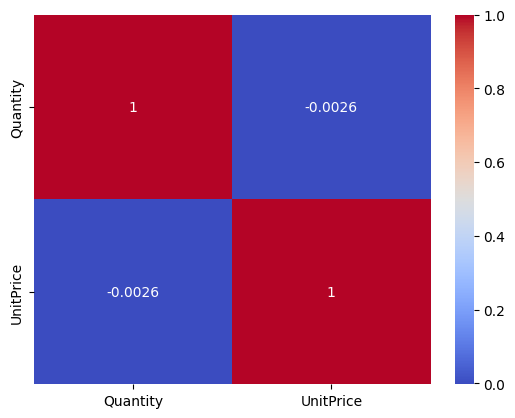

In [35]:
# Sayısal sütunları seçerek korelasyonu hesaplayın
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Korelasyon matrisini görselleştirin
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


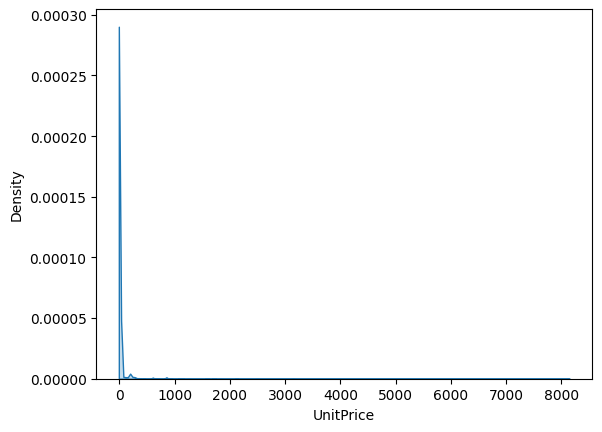

In [36]:
# numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['UnitPrice'], fill = True);

**5. Aykırı Değer Analizi (Outliers)**

Aykırı değer analizi, veri setindeki normalden farklı, aşırı büyük ya da küçük olan verilerin tespit edilmesi sürecidir. Bu tür veriler, genellikle hata, ölçüm hatası, veri toplama hataları veya nadir olayları temsil edebilir. Aykırı değerlerin doğru bir şekilde tespit edilmesi, model performansını iyileştirebilir çünkü bu değerler, modelin doğru öğrenmesini engelleyebilir veya yanıltıcı sonuçlar doğurabilir.

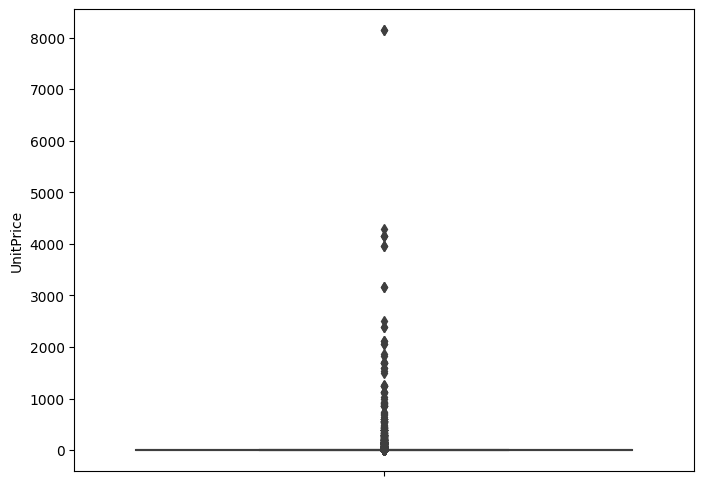

In [37]:
#  IQR'a göre aykırı değerleri görselleştirebiliriz.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["UnitPrice"],
            orient = "v");


In [38]:
# Quantile değerlerin belirlenmesi.
Q1 = df["UnitPrice"].quantile(0.25)
Q3 = df["UnitPrice"].quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

1.25
3.75
2.5


Aykırı Gözlemlerin Silinmesi

In [39]:
df_del = df[~(df["UnitPrice"] > upper_fence)]

df_del

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4.0,12/9/2011 12:50,3.75,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4.0,12/9/2011 12:50,4.15,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


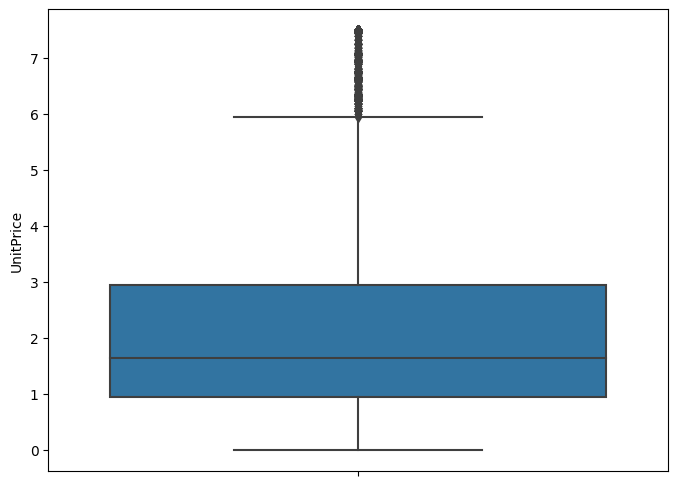

In [40]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["UnitPrice"],
            orient = "v");

Aykırı değerlerin yerini ortalama değerlerle doldurma

In [41]:
df.loc[df["UnitPrice"] > upper_fence, "UnitPrice"] = df["UnitPrice"].mean()

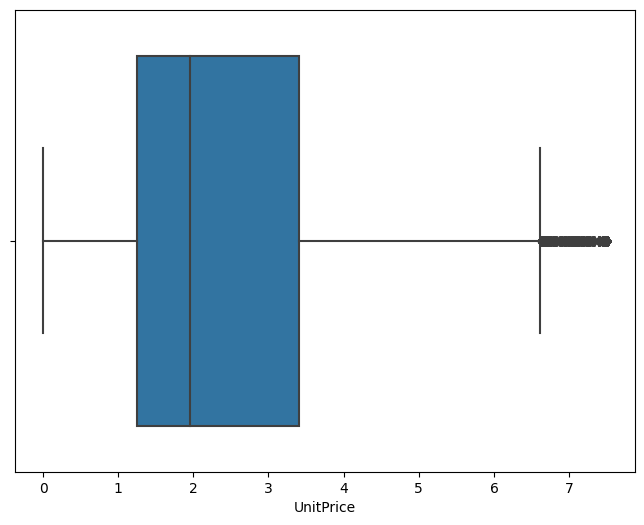

In [42]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df["UnitPrice"],
            orient = "h");  # Horizontal boxplot


**6. Feature Engineering**

UnitPrice Segmentasyonu: UnitPrice değerlerini düşük, orta ve yüksek kategorilere ayırarak, ürün fiyatlarının hangi aralıklarda yoğunlaştığını ve fiyat dağılımını daha kolay analiz etmeyi sağlar. Bu, farklı fiyat segmentleriyle ilgili kararlar alırken yararlıdır.

In [43]:
def unit_price_range(unit_price):
    if unit_price < 10:
        return 'Low'
    elif 10 <= unit_price <= 50:
        return 'Medium'
    else:
        return 'High'

# UnitPrice bazında segmentasyonu uygulama
df['unit_price_range'] = df['UnitPrice'].apply(unit_price_range)

# İlk 3 satırı görüntüleme
df.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,unit_price_range
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,Low
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,Low
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,Low


Quantity Segmentasyonu: Quantity değerlerini düşük, orta ve yüksek kategorilere ayırarak, her bir ürün için satılan miktarın hangi seviyelerde olduğunu gösterir. Bu, satış performansını analiz etmek, hangi ürünlerin daha fazla satıldığını ve hangi segmentlerde yoğunlaştığını anlamak için kullanılır.

In [44]:
def quantity_range(quantity):
    if quantity < 50:
        return 'Low'
    elif 50 <= quantity <= 200:
        return 'Medium'
    else:
        return 'High'

# Quantity bazında segmentasyonu uygulama
df['quantity_range'] = df['Quantity'].apply(quantity_range)

# İlk 3 satırı görüntüleme
df.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,unit_price_range,quantity_range
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,Low,Low
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,Low,Low
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,Low,Low
